In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [64]:
data = pd.read_excel('StoresData.xlsx',header=0)
print(data.head())


   Store No.  Sales $m  Wages $m  No. Staff Location  Loc'n (Num) State  \
0          1      12.5       2.3         60     Mall            2   NSW   
1          2      14.5       2.7         69     Mall            2   Vic   
2          3      19.0       3.1         79  Country            3   Vic   
3          4      18.2       2.6         66     Mall            2   Qld   
4          5       7.6       2.0         51    Strip            1   Qld   

   State (Num)  Age (Yrs)  GrossProfit  ...  Mng-Sex (Num)  Mng-Age  Mng-Exp  \
0            1         10        0.712  ...              0       33       12   
1            2          8        0.091  ...              0       33       16   
2            2          7        1.075  ...              0       30        9   
3            3          7        1.372  ...              0       29        9   
4            3         15        2.148  ...              0       36        4   

  Mng-Train  Union% Car Spaces  HomeDel  HomeDel (Num)  Basket:2013 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# لكشف النصوص
text_columns = data.select_dtypes(include=['object']).columns

print("النص:")
print(text_columns)

# نستخدم LabelEncoder لكل الأعمدة النصية
label_enc = LabelEncoder()

for col in text_columns:
    data[col] = label_enc.fit_transform(data[col])

الأعمدة النصية اللي موجودة:
Index(['Location', 'State', 'Sundays', 'Mng-Sex', 'HomeDel'], dtype='object')


In [ ]:
# قيم مفقودة
print(data.isnull().sum())

#تحويل اي string الي 0و1
label_enc = LabelEncoder()
data['Location'] = label_enc.fit_transform(data['Location'])  # 0=Country, 1=Mall, 2=Strip
data['Sundays'] = label_enc.fit_transform(data['Sundays'])    # 0=No, 1=Yes
data['HomeDel'] = label_enc.fit_transform(data['HomeDel'])    # 0=No, 1=Yes

Store No.        0
Sales $m         0
Wages $m         0
No. Staff        0
Location         0
Loc'n (Num)      0
State            0
State (Num)      0
Age (Yrs)        0
GrossProfit      0
Adv.$'000        0
Competitors      0
HrsTrading       0
Sundays          0
Sundays (Num)    0
Mng-Sex          0
Mng-Sex (Num)    0
Mng-Age          0
Mng-Exp          0
Mng-Train        0
Union%           0
Car Spaces       0
HomeDel          0
HomeDel (Num)    0
Basket:2013      0
Basket:2014      0
dtype: int64


In [ ]:
# مدخلات
features = data.drop(['Sundays', 'Location', 'HomeDel'], axis=1)

# أهداف
target_sundays = data['Sundays']
target_location = data['Location']
target_homedel = data['HomeDel']

In [68]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(features, target_sundays, test_size=0.2, random_state=42)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(features, target_location, test_size=0.2, random_state=42)
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(features, target_homedel, test_size=0.2, random_state=42)

In [70]:
# Sundays
model_s = DecisionTreeClassifier(random_state=42)
model_s.fit(X_train_s, y_train_s)
y_pred_s = model_s.predict(X_test_s)

# Location
model_l = DecisionTreeClassifier(random_state=42)
model_l.fit(X_train_l, y_train_l)
y_pred_l = model_l.predict(X_test_l)

# Home Delivery
model_h = DecisionTreeClassifier(random_state=42)
model_h.fit(X_train_h, y_train_h)
y_pred_h = model_h.predict(X_test_h)

In [71]:
# تقييم Sundays
print("Accuracy for Sundays:", accuracy_score(y_test_s, y_pred_s))
print(confusion_matrix(y_test_s, y_pred_s))
print(classification_report(y_test_s, y_pred_s))

# تقييم Location
print("Accuracy for Location:", accuracy_score(y_test_l, y_pred_l))
print(confusion_matrix(y_test_l, y_pred_l))
print(classification_report(y_test_l, y_pred_l))

# تقييم HomeDel
print("Accuracy for Home Delivery:", accuracy_score(y_test_h, y_pred_h))
print(confusion_matrix(y_test_h, y_pred_h))
print(classification_report(y_test_h, y_pred_h))

Accuracy for Sundays: 1.0
[[ 7  0]
 [ 0 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        23

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for Location: 1.0
[[ 7  0  0]
 [ 0 12  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for Home Delivery: 1.0
[[22  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00

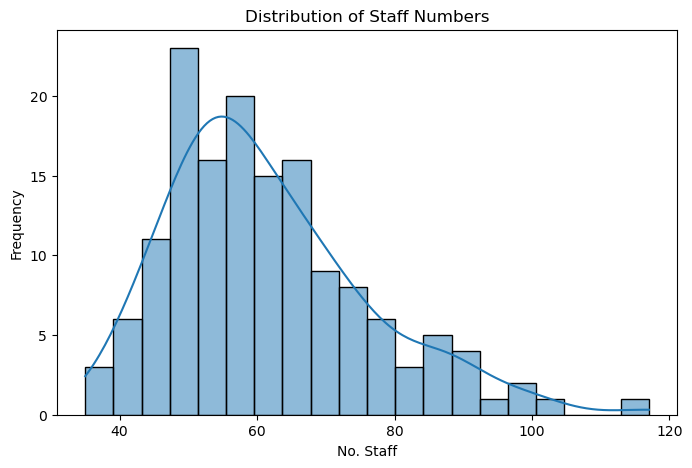

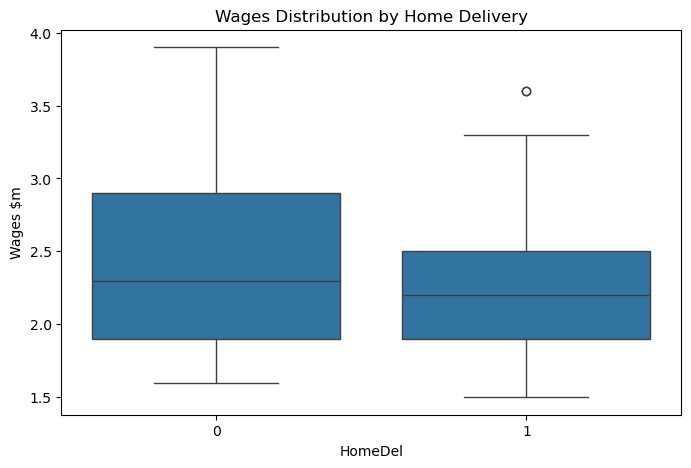

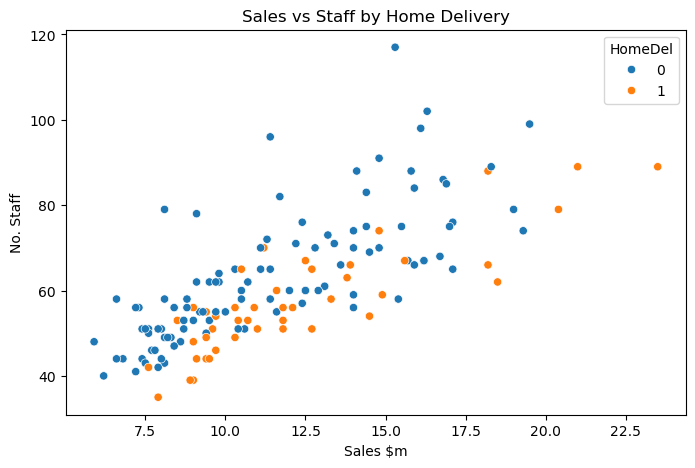

In [ ]:


#  رسوم بيانية
plt.figure(figsize=(8,5))
sns.histplot(data['No. Staff'], bins=20, kde=True)
plt.title('Distribution of Staff Numbers')
plt.xlabel('No. Staff')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='HomeDel', y='Wages $m', data=data)
plt.title('Wages Distribution by Home Delivery')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Sales $m', y='No. Staff', hue='HomeDel', data=data)
plt.title('Sales vs Staff by Home Delivery')
plt.show()